In [1]:
import numpy as np
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
cwd = os.getcwd()
print(cwd)

C:\Users\User\Documents\DS\GAN_phase_1\training


In [ ]:
path = cwd+r'\tvae_trn01'  
os.chdir(path)

In [44]:
with open (r"C:\Users\User\Documents\DS\GAN_phase_1\training\tvae_trn01\summary_PID20206_20210812_001521_0.txt", "r") as myfile:
    data = myfile.readlines()

In [45]:
model_info=list(map(lambda x: x[17:-1], data[0:14]))
model_info.append(data[-1][17:-1])
model_info

['PyTorch seed number 5',
 'Numpy seed number 5',
 'Learning rate: 2e-05',
 'Embedding: 128',
 'Depth: 3',
 'Width: 512',
 'Batch size: 750',
 'Number of Epochs: 500',
 'Loss factor: 1',
 'Log frequency: True',
 'Encoder cond. vector: False',
 'L2 scale: 1e-05',
 'Latent cond. vector: False',
 'data dimension: 2385',
 'Training time 9541.73 seconds']

In [46]:
data_info=pd.DataFrame(data[14:-1])
data_info[['Epoch','Training_Loss','Validation_Loss']] = data_info[0].str.split(',',expand=True)
data_info['Epoch'] = data_info['Epoch'].apply(lambda x: int(x[23::]))
data_info['Training_Loss'] = data_info['Training_Loss'].apply(lambda x: float(list((re.compile('-?\d+.\d+')).findall(x))[0]))
data_info['Validation_Loss'] = data_info['Validation_Loss'].apply(lambda x: float(list((re.compile('\d+.\d+')).findall(x))[0]))

In [47]:
data_info = data_info.drop([0], 1)
data_info.head(10)

,Epoch,Training_Loss,Validation_Loss
0,1,251.429630,252.470550
1,2,123.447075,126.151760
2,3,106.950760,110.135100
3,4,103.324135,106.974396
4,5,101.683210,105.700140
5,6,100.916145,104.899570
6,7,100.189570,104.328310
7,8,99.628030,103.944466
8,9,99.049920,103.567270
9,10,98.506150,103.152820


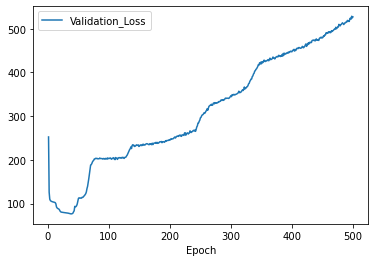

In [48]:
data_info.plot( 'Epoch' , 'Validation_Loss' )

In [49]:
loss_min=min(data_info['Validation_Loss'])
loss_min

76.37142

In [50]:
loss_range_max=(max(data_info['Validation_Loss'])-loss_min)*0.2+loss_min
data_info['Validation_Loss']

166.82322200000002

In [54]:
range_data=data_info[data_info['Validation_Loss']<=loss_range_max]
epoch_min=min(range_data['Epoch'])  
epoch_max=max(range_data['Epoch']) 

In [55]:
epoch_min

2

In [56]:
epoch_max

67